In [1]:
# === Mandatory Header ===
import sys
LEVEL = '../'
sys.path.append(LEVEL)
# =========================

# imports 
import matplotlib.pyplot as plt
from util.load import load_satcat_by_date

## SatCat Exploratory Data Analysis (EDA)

The Satellite Catalog (SatCat) provides a comprehensive history of every unclassified object that has ever existed in Earth's orbit. This includes objects that have re-entered the atmosphere (splashdowns or burn-ups) or have been retired.

Each entry in the SatCat contains 24 columns of information per object:

<table>
<tbody>
    <tr><th>Field</th><th>Description</th><th>Notes</th></tr>
    <tr><td>INTLDES</td><td>Can be used to uniquely identify an object using launch year, number, and piece</td><td>Also known as COSPAR designation or NSSDC ID</td></tr>
    <tr><td>NORAD_CAT_ID</td><td>Sequential number assigned by the US Space Force as objects are cataloged</td><td>This is the most common way of identifying a satellite</td></tr>
    <tr><td>OBJECT_TYPE</td><td>Identifies the kind of object it is</td><td>Choices: 'ROCKET BODY', 'PAYLOAD', 'DEBRIS', 'UNKNOWN'</td></tr>
    <tr><td>SATNAME</td><td>Name associated with the satellite</td><td></td></tr>
    <tr><td>COUNTRY</td><td>The nation or group responsible for the object</td><td></td></tr>
    <tr><td>LAUNCH</td><td>Date of launch</td><td>Format: YYYY-MM-DD</td></tr>
    <tr><td>SITE</td><td>Location/site of launch</td><td></td></tr>
    <tr><td>DECAY</td><td>Date that the object decayed; NaN if the object has not yet decayed</td><td></td></tr>
    <tr><td>PERIOD</td><td>The number of minutes an object takes to complete one full orbit</td><td>Generally wise to use the most recent state for this information</td></tr>
    <tr><td>INCLINATION</td><td>The angle between the equator and the orbital plane</td><td>Generally wise to use the most recent state for this information</td></tr>
    <tr><td>APOGEE</td><td>Point in the orbit where an Earth satellite is farthest from the Earth (kilometers)</td><td>Generally wise to use the most recent state for this information</td></tr>
    <tr><td>PERIGEE</td><td>Point in the orbit where an Earth satellite is closest to the Earth (kilometers)</td><td>Generally wise to use the most recent state for this information</td></tr>
    <tr><td>COMMENT</td><td>Very rare; sometimes objects have a string with notes</td><td></td></tr>
    <tr><td>COMMENTCODE</td><td>Usually NaN; otherwise a number associated with COMMENT</td><td></td></tr>
    <tr><td>RCSVALUE</td><td>(HIDDEN) Always zero</td><td>Higher data access needed to get exact values</td></tr>
    <tr><td>RCS_SIZE</td><td>Vague description of object size</td><td>Values: 'LARGE', 'MEDIUM', 'SMALL', or NaN</td></tr>
    <tr><td>FILE</td><td>Unique identifying number of the source file for an object's data; higher numbers are more recent uploads</td><td></td></tr>
    <tr><td>LAUNCH_YEAR</td><td>Year of launch (YYYY)</td><td></td></tr>
    <tr><td>LAUNCH_NUM</td><td>Launch number</td><td></td></tr>
    <tr><td>LAUNCH_PIECE</td><td>Three-letter code representing the sequential identifier of a piece in a launch</td><td></td></tr>
    <tr><td>CURRENT</td><td>Documentation is unclear, but the value is always 'Y' for general access</td><td></td></tr>
    <tr><td>OBJECT_NAME</td><td>Name of the object</td><td>identical to SATNAME</td></tr>
    <tr><td>OBJECT_ID</td><td>Unique identifier for the object</td><td>identical to INTLDES</td></tr>
    <tr><td>OBJECT_NUMBER</td><td>Unique identifier for the object</td><td>identical to NORAD_CAT_ID</td></tr>
</tbody>
</table>


---
### Load Data 
---

In [2]:
df_satcat = load_satcat_by_date('24May2025')

---
### High Level Look
---

In [3]:
df_satcat.head(3)

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,SITE,DECAY,PERIOD,INCLINATION,...,RCSVALUE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,1957-001A,1,ROCKET BODY,SL-1 R/B,CIS,1957-10-04,TTMTR,1957-12-01,96.19,65.10,...,0,LARGE,1,1957,1,A,Y,SL-1 R/B,1957-001A,1
1,1958-001A,4,PAYLOAD,EXPLORER 1,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,...,0,NaN,1,1958,1,A,Y,EXPLORER 1,1958-001A,4
2,1958-003A,6,PAYLOAD,EXPLORER 3,US,1958-03-26,AFETR,1958-06-28,103.60,33.50,...,0,NaN,1,1958,3,A,Y,EXPLORER 3,1958-003A,6


In [4]:
print('total objects in catalog: ',df_satcat.shape[0])

total objects in catalog:  64011


In [5]:
df_satcat.describe() 

,NORAD_CAT_ID,PERIOD,INCLINATION,APOGEE,PERIGEE,COMMENTCODE,RCSVALUE,FILE,LAUNCH_YEAR,LAUNCH_NUM,OBJECT_NUMBER
count,64011.000000,63037.000000,63037.000000,63037.000000,63037.000000,3517.000000,64011.0,64011.000000,64011.000000,64011.000000,64011.000000
mean,32015.650919,178.180192,68.902649,3550.205752,1743.955106,3.291157,0.0,7142.294449,1996.827217,59.018200,32015.650919
std,18492.265470,690.084959,25.061502,13831.789472,6734.843480,1.409969,0.0,3242.574651,19.517696,42.904259,18492.265470
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1957.000000,0.000000,1.000000
25%,16003.500000,89.260000,53.000000,267.000000,196.000000,3.000000,0.0,7337.000000,1981.000000,25.000000,16003.500000
50%,32006.000000,94.110000,70.190000,484.000000,409.000000,3.000000,0.0,8690.000000,1995.000000,51.000000,32006.000000
75%,48008.500000,101.140000,92.000000,878.000000,672.000000,5.000000,0.0,9134.000000,2019.000000,84.000000,48008.500000
max,64095.000000,95687.680000,152.520000,641287.000000,299435.000000,5.000000,0.0,9138.000000,2025.000000,254.000000,64095.000000


---
### Categorical variables
---

#### Summary of Findings

1. `INTLDES`/`OBJECT_ID`, `NORAD_CAT_ID`/`OBJECT_NUMBER`, and `SATNAME`/`OBJECT_NAME` are redundant pairs

2. `LAUNCH_PIECE` contains nan values

3. `SATNAME`/`OBJECT_NAME` contain duplicate strings.  

In [6]:
features_cat = ['INTLDES', 'NORAD_CAT_ID', 'OBJECT_TYPE', 'SATNAME', 'COUNTRY',
       'LAUNCH', 'SITE', 'DECAY','COMMENT', 'COMMENTCODE', 'RCSVALUE', 'RCS_SIZE', 'FILE', 'LAUNCH_YEAR',
       'LAUNCH_NUM', 'LAUNCH_PIECE', 'CURRENT', 'OBJECT_NAME', 'OBJECT_ID',
       'OBJECT_NUMBER']

#### i. Object Identifiers

We have several fields that can be usued to identify objects (`INTLDES`, `NORAD_CAT_ID`, `SATNAME`, `LAUNCH_YEAR`, `LAUNCH_NUM, LAUNCH_PIECE`, `OBJECT_NAME`, `OBJECT_ID`). In this subsection we will answer basic questions about these fields as well as learn more about the data. 

**Q: Are `INTLDES` and `OBJECT_ID` always identical/redundant? Is either ever null? Is each row unique?** 

**A: Yes, they appear to be identical; No, neither are ever null; No duplicates** 

In [7]:
print('number of rows that differ:', len(df_satcat[~(df_satcat['INTLDES']==df_satcat['OBJECT_ID'])]))
print('number null:', len(df_satcat[df_satcat['INTLDES'].isna()]))
print('number of duplicates', (df_satcat['INTLDES'].duplicated()).sum())

number of rows that differ: 0
number null: 0
number of duplicates 0


**Q: Are `NORAD_CAT_ID` and `OBJECT_NUMBER` always identical/redundant? Is either ever null? Is each row unique?** 

**A: Yes, they appear to be identical; No, neither are ever null; No Duplicates.** 

In [8]:
print('number of rows that differ:', len(df_satcat[~(df_satcat['NORAD_CAT_ID']==df_satcat['OBJECT_NUMBER'])]))
print('number null:', len(df_satcat[df_satcat['NORAD_CAT_ID'].isna()]))
print('number of duplicates', (df_satcat['NORAD_CAT_ID'].duplicated()).sum())

number of rows that differ: 0
number null: 0
number of duplicates 0


**Q: Are `SATNAME` and `OBJECT_NAME` always identical/redundant? Is either ever null? Is each row unique?** 

**A: Yes, they appear to be identical; No, neither are ever null;** 
**Yes, there are duplicates so you can't use this field as an ID; debris and rocketbodies for a payload will not be reliably unique.**

In [9]:
print('number of rows that differ:', len(df_satcat[~(df_satcat['SATNAME']==df_satcat['OBJECT_NAME'])]))
print('number null:', len(df_satcat[df_satcat['SATNAME'].isna()]))
print('number of duplicates', (df_satcat['SATNAME'].duplicated()).sum())

number of rows that differ: 0
number null: 0
number of duplicates 41064


In [10]:
# sneak peak at duplicate names
df_satcat['SATNAME'].value_counts()[lambda x: x > 1]

SATNAME
FENGYUN 1C DEB        3475
COSMOS 1408 DEB       1806
DELTA 1 DEB           1800
COSMOS 2251 DEB       1714
CZ-6A DEB             1461
                      ... 
THOR BURNER 2A R/B       2
COSMOS 443 DEB           2
OPS 3559                 2
DISCOVERER 32 DEB        2
COSMOS 490 DEB           2
Name: count, Length: 1396, dtype: int64

In [11]:
# sneak peak at duplicate names (no DEB/R/B)
df_satcat['SATNAME'].value_counts()[lambda x: (x > 1) & ~x.index.str.contains('DEB|R/B', regex=True)]

SATNAME
SL-6 PLAT           289
SL-12 PLAT          232
WESTFORD NEEDLES    145
OBJECT B             86
OBJECT C             81
                   ... 
OPS 3722              2
PACE                  2
FTV 1154              2
PAYLOAD B             2
OPS 3559              2
Name: count, Length: 94, dtype: int64

**Q: Can use use `LAUNCH_YEAR`, `LAUNCH_NUM`, and `LAUNCH_PIECE` to reconstruct `INTLDES`/`OBJECT_ID`?**

**A: Yes but you have (1) make sure your launch number is padded with zeros (e.g.: 001, 011, 111) and (2) replace NaN launch pieces with 'NA'**

In [12]:
df_satcat['LAUNCH_NUM_padded'] = df_satcat['LAUNCH_NUM'].astype(str).str.pad(width=3, side='left', fillchar='0')
df_satcat['LAUNCH_PIECE_no_nan'] = df_satcat['LAUNCH_PIECE'].fillna('NA')
df_satcat['INTLDES_reconstructed'] = (df_satcat['LAUNCH_YEAR'].astype(str) + '-' +df_satcat['LAUNCH_NUM_padded'].astype(str) +df_satcat['LAUNCH_PIECE_no_nan'].astype(str))

print('number of rows that differ:', len(df_satcat[~(df_satcat['INTLDES']==df_satcat['INTLDES_reconstructed'])]))

number of rows that differ: 0


**Q: Are there any trends in the objects with an undefined `LAUNCH_PIECE` field?**

**A: Yes,**

1. Most are Debris

2. Are all LEO (see `PERIOD`)

3. almost half have decayed

In [13]:
df_satcat['IS_DECAYED'] = df_satcat['DECAY'].isna()
null_lp = df_satcat[df_satcat['LAUNCH_PIECE'].isna()]
print("Number of objects with no launch piece:", len(null_lp))

Number of objects with no launch piece: 19


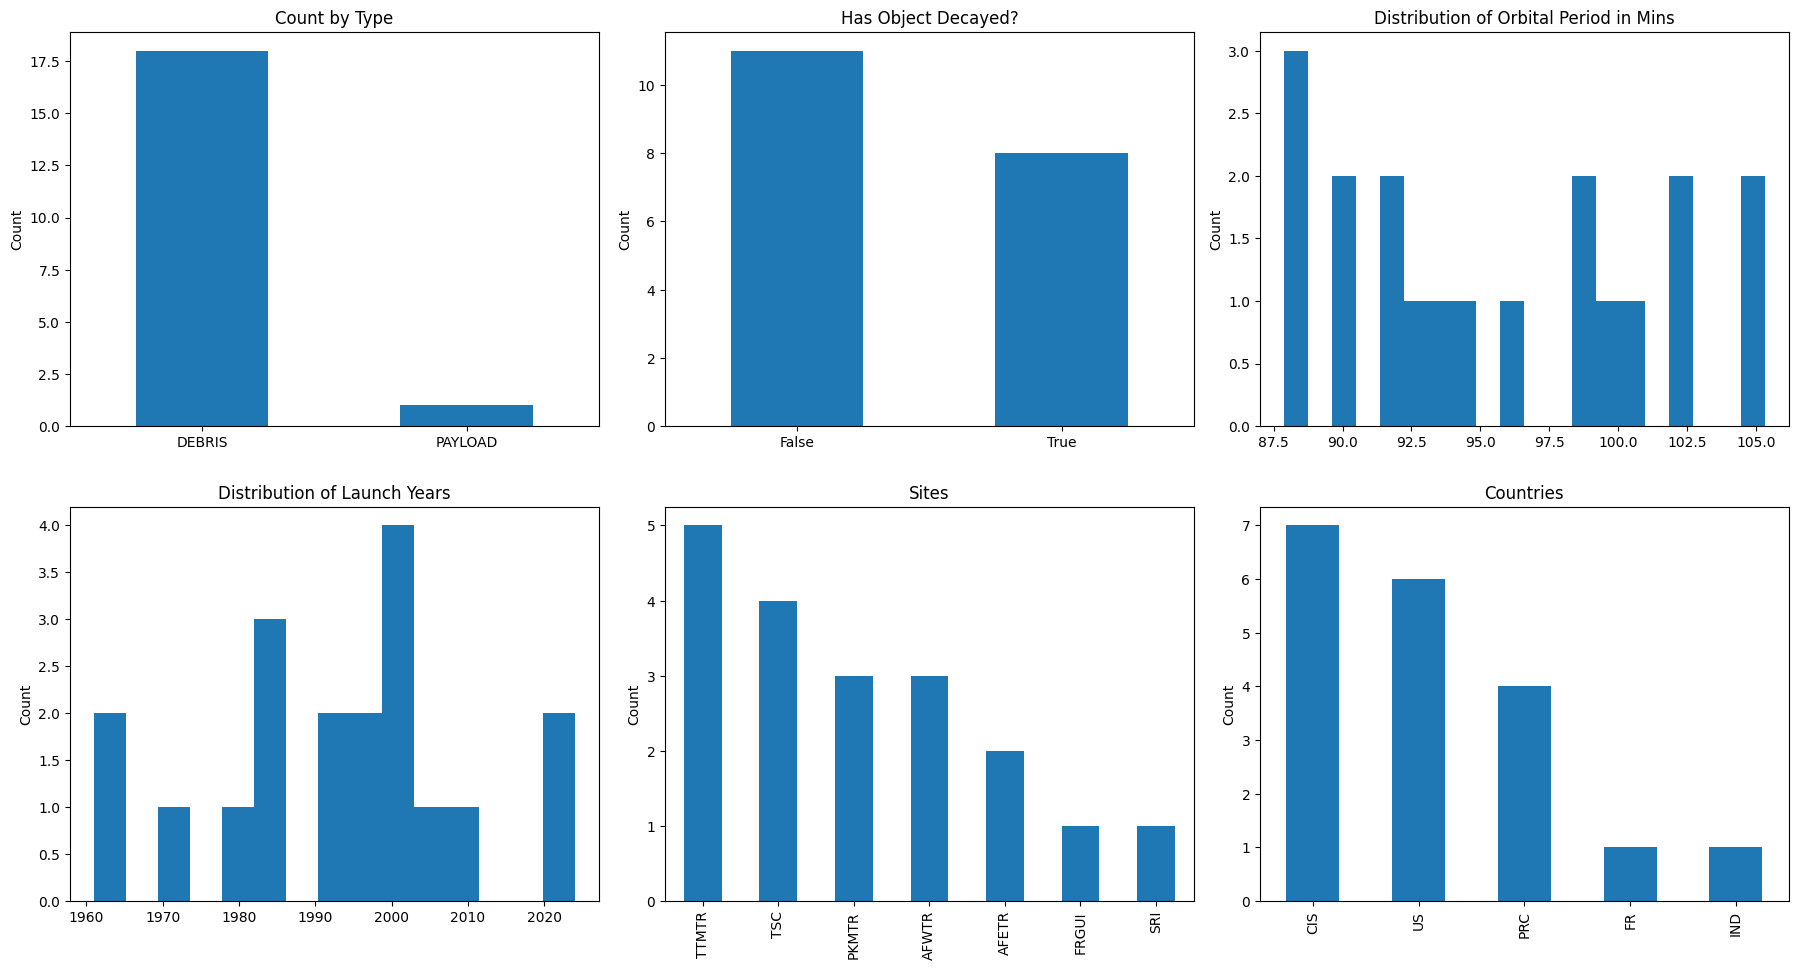

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

null_lp['OBJECT_TYPE'].value_counts().plot.bar(ax=axes[0, 0], title='Count by Type')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

null_lp['IS_DECAYED'].value_counts().plot.bar(ax=axes[0, 1], title='Has Object Decayed?')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

null_lp['PERIOD'].plot.hist(bins=20, ax=axes[0, 2], title='Distribution of Orbital Period in Mins')
null_lp['LAUNCH_YEAR'].plot.hist(bins=15, ax=axes[1, 0], title='Distribution of Launch Years')
null_lp['SITE'].value_counts().plot.bar(ax=axes[1, 1], title='Sites')
null_lp['COUNTRY'].value_counts().plot.bar(ax=axes[1, 2], title='Countries')

plt.tight_layout()
for ax in axes.flatten():
    ax.set_xlabel('')  
    ax.set_ylabel('Count')

---
### Numerical Variables
---